# <center> On Invariance In Optimization
## <center> Implementations for Part 1

DE and PSO has been immplemented and tested

In [236]:
# !pip install portion
import portion as p
import numpy as np
import random
import matplotlib.pyplot as plt
import sys, os
import contextlib

@contextlib.contextmanager
def suppress_print():
    """
    this is like verbose = false
    """
    with open(os.devnull, 'w') as fnull:
        original_stdout = sys.stdout
        sys.stdout = fnull
        try:
            yield
        finally:
            sys.stdout = original_stdout
    
def DifferentialEvolution(objective, dimension:int, popsize:int, crossover:float, diffweight:float, T:int, seed = None, target = None):
    # constraints on the parameters
    dimensionvalid = list(range(1, 50))
    if dimension not in dimensionvalid:
        raise ValueError('DifferentialEvolution: dimension should be between 1 and 50')
    crossovervalid = p.closed(0,1)
    if crossover not in crossovervalid:
        raise ValueError('DifferentialEvolution: crossover should be a probability')
    diffweightvalid = p.closed(0, 2)
    if diffweight not in diffweightvalid:
        raise ValueError('DifferentialEvolution: diffweight should be in %r' % diffweightvalid)
    if popsize < 4:
        raise ValueError('DifferentialEvolution: popsize should be >= 4')
    '''
    we are considering function whose domain is R^d
    unconstrained optimization.
    '''
    objective_log = []
    func_eval_log = []
    # Initial vectors
    if seed is not None:
        np.random.seed(seed)
    vectors = [np.random.random(dimension) for _ in range(popsize)]
    print('Iteration                  FuncEval                  Min')
    print('---------                 ---------                 ---------')
    #  >>>>>>> Begin Algorithm <<<<<<<<<<<<
    for i in range(T):
        vectors = np.array(vectors)  # make sure it is an np.array 
        # picking three different vectors for each vector
        for index, vector in enumerate(vectors):
            list_no_vector = list(np.delete(vectors, index, axis = 0))
            randomvectors = random.sample(list_no_vector, 3)  # For NumPy arrays
             # OR
             # randomvectors = random.sample([ele for ele in vectors if ele != vector], 3)  # For lists
            R = random.randint(1, dimension)
            y = np.zeros(dimension)
            # update dimensions
            for j in range(dimension):
                r = np.random.uniform(0,1)
                if  r < crossover or j == R:
                    y[j] = (randomvectors[0][j] + diffweight * (randomvectors[1][j] - randomvectors[2][j]))
                else: 
                    y[j] = (vector[j])
            if objective(y) < objective(vector):
                vectors[index] = y
    # >>>>>>>>>>  End Algorithm  <<<<<<<<<<<<
        if i%20 == 0:
            func_eval_log.append(2*i*popsize)
            objective_log.append(min([objective(i) for i in vectors]))
            print('{}                        {}                       {}        '.format(i, (2 *i*popsize), (min([objective(i) for i in vectors]))))
        if target is not None and min([objective(i) for i in vectors]) < target:
            target_num_func_eval = 2*i*popsize
            break
        else: 
            target_num_func_eval = 0
            continue
    images = [objective(i) for i in vectors]
    print('The minimum is:{}'.format(min(images)))
    print('Minimizer is: {}'.format(vectors[np.argmin(images)]))
    return func_eval_log, objective_log, vectors[np.argmin(images)] , min(images), target_num_func_eval            

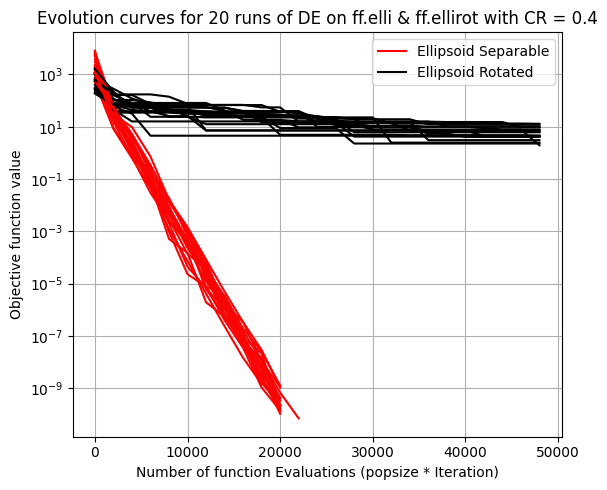

In [241]:
#!pip install cma
import cma

# Initialize a list to hold legend labels
legend_labels = []
dimension = 5
NP = 50
cr = 0.4
iteration = 500
for i in range(20):
    with suppress_print():
        funceval_elli_notone, objective_elli_notone, x_elli_notone, min_elli_notone, x = DifferentialEvolution(cma.ff.elli,
                                                                                                                dimension, NP,  cr, 0.8, iteration, target = 1e-10, seed = i)
        funceval_ellirot_notone, objective_ellirot_notone, x_ellirot_notone, min_ellirot_notone, y = DifferentialEvolution(cma.ff.ellirot, dimension, NP,
                                                                                                                             cr, 0.8, iteration, target = 1e-10, seed = i)
    plt.rcParams["figure.figsize"] = [6, 5]
    plt.rcParams["figure.autolayout"] = True
    # Plotting the evolution curve
    plt.plot(funceval_elli_notone, objective_elli_notone, label = 'Ellipsoid Separable', color = 'red')
    plt.plot(funceval_ellirot_notone, objective_ellirot_notone, label = 'Ellipsoid Rotated', color = 'black')
    

     # Collect legend labels
    if i == 0:
        legend_labels.extend([label for label in plt.gca().get_legend_handles_labels()[1]])
        
    # log scale
    plt.yscale('log')
    plt.xlabel('Number of function Evaluations (popsize * Iteration)')
    plt.ylabel('Objective function value')
    plt.title('Evolution curves for 20 runs of DE on ff.elli & ff.ellirot with CR = {}'.format(cr))
plt.legend(legend_labels)
plt.grid()    
plt.show()

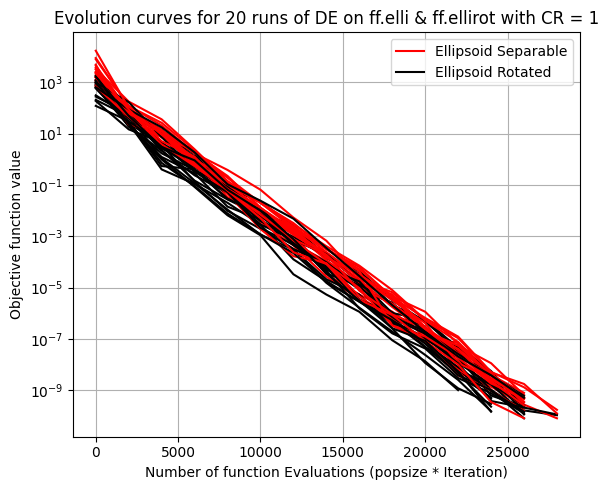

In [242]:
#!pip install cma
import cma

# Initialize a list to hold legend labels
legend_labels = []
dimension = 5
NP = 50
cr = 1
iteration = 500
for i in range(20):
    with suppress_print():
        funceval_elli_notone, objective_elli_notone, x_elli_notone, min_elli_notone, x = DifferentialEvolution(cma.ff.elli,
                                                                                                                dimension, NP,  cr, 0.8, iteration, target = 1e-10, seed = i)
        funceval_ellirot_notone, objective_ellirot_notone, x_ellirot_notone, min_ellirot_notone, y = DifferentialEvolution(cma.ff.ellirot, dimension, NP,
                                                                                                                             cr, 0.8, iteration, target = 1e-10, seed = i)
    plt.rcParams["figure.figsize"] = [6, 5]
    plt.rcParams["figure.autolayout"] = True
    # Plotting the evolution curve
    plt.plot(funceval_elli_notone, objective_elli_notone, label = 'Ellipsoid Separable', color = 'red')
    plt.plot(funceval_ellirot_notone, objective_ellirot_notone, label = 'Ellipsoid Rotated', color = 'black')
    

     # Collect legend labels
    if i == 0:
        legend_labels.extend([label for label in plt.gca().get_legend_handles_labels()[1]])
        
    # log scale
    plt.yscale('log')
    plt.xlabel('Number of function Evaluations (popsize * Iteration)')
    plt.ylabel('Objective function value')
    plt.title('Evolution curves for 20 runs of DE on ff.elli & ff.ellirot with CR = {}'.format(cr))
plt.legend(legend_labels)
plt.grid()    
plt.show()

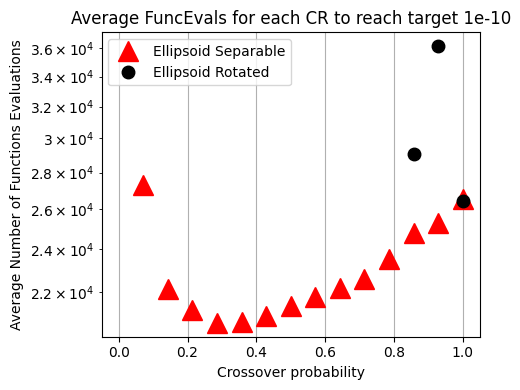

In [257]:

CR = np.linspace(0, 1, 15)
Target = 1e-10
iteration = 500
avg_func_eval_elli = []
avg_func_eval_ellirot = []
for _ in CR:
    func_eval_elli = []
    func_eval_ellirot = []
    for i in range(20):
        with suppress_print():
            funceval_elli_notone, objective_elli_notone, x_elli_notone, min_elli_notone,x = DifferentialEvolution(cma.ff.elli, 5, 50,  _, 0.8, iteration, target = Target)
            funceval_ellirot_notone, objective_ellirot_notone, x_ellirot_notone, min_ellirot_notone, y = DifferentialEvolution(cma.ff.ellirot, 5,
                                                                                                                                50,  _, 0.8, iteration, target = Target)
            func_eval_elli.append(x)
            func_eval_ellirot.append(y)
    avg_func_eval_elli.append(np.mean(func_eval_elli))
    avg_func_eval_ellirot.append(np.mean(func_eval_ellirot))

plt.rcParams["figure.figsize"] = [5, 4]
plt.rcParams["figure.autolayout"] = True
plt.plot(CR, avg_func_eval_elli, '^', label = 'Ellipsoid Separable', color = 'red', markersize = 14)
plt.plot(CR, avg_func_eval_ellirot, 'o', label = 'Ellipsoid Rotated', color = 'black', markersize = 9)
plt.yscale('log')
plt.xlabel('Crossover probability')
plt.ylabel('Average Number of Functions Evaluations')
plt.title('Average FuncEvals for each CR to reach target {}'.format(Target))
plt.legend(loc = 'best')
plt.grid()    
plt.show()

COCO benchmarks using cocoex and cocopp make sure you have the modules and you are in the right directory to run these two experiments.

In [ ]:
run DE_with_CR1.py

In [ ]:
# change directory to path 2
run DE_with_CR_not_one.py

In [ ]:
#!pip install cocopp
import cocopp
#replace with the correct output folder name
cocopp.main('exdata/DifferentialEvolution_of___main___100000D_on_bbob exdata/DifferentialEvolution_CR_1_of___main___100000D_on_bbob')

In [273]:
import portion as p
import numpy as np
import random
import matplotlib.pyplot as plt
import sys, os
import contextlib
def DE(objective, vectors, crossover: float, diffweight: float, T: int, target=None, seed=None):
    if seed is not None:
        np.random.seed(seed)
        random.seed(seed)

    for i in range(T):
        Y = []
        vectors = np.array(vectors)
        num_vectors = len(vectors)
        indices = list(range(num_vectors))
        random.shuffle(indices)  # Shuffle the indices
        for index, vector in enumerate(vectors):
            # Get the first three shuffled indices (excluding the current index)
            sampled_indices = [idx for idx in indices if idx != index][:3]
            randomvectors = [vectors[i] for i in sampled_indices]
            R = np.random.randint(0, len(vectors[0]))
            y = np.zeros(len(vectors[0]))

            for j in range(len(vectors[0])):
                r = np.random.uniform(0, 1)
                if r < crossover or j == R:
                    y[j] = (randomvectors[0][j] + diffweight * (randomvectors[1][j] - randomvectors[2][j]))
                else:
                    y[j] = (vector[j])
            Y.append(y)

            if objective(y) < objective(vector):
                vectors[index] = y


        if target is not None and min([objective(i) for i in vectors]) < target:
            break

    return vectors, Y


#write a function that rotates the 2d vectors in an array according to theta

def rotate2d_vectors(vectors, theta):
    rotationmatrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    return [np.matmul(rotationmatrix, np.array(i)) for i in vectors]
def rotate2d(vector, theta):
    rotationmatrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    return np.matmul(rotationmatrix, np.array(vector))
def homomorphism(vectors, theta):
    inverse_rotationmatrix = np.linalg.inv(np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]]))
    return [np.matmul(inverse_rotationmatrix, np.array(i)) for i in vectors]

def square_sum(x):
    return np.sum([(i**2) for i in x])

def square_sum_rotated(x):
    return np.sum([(i**2) for i in rotate2d(x, np.pi/4)])


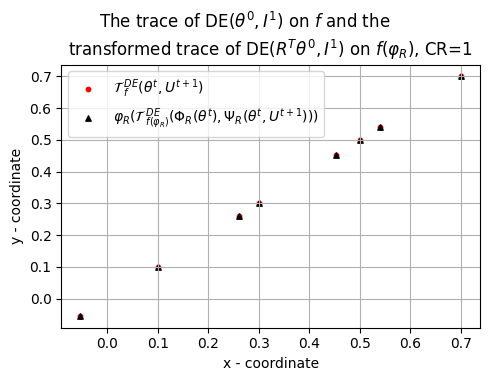

In [274]:
#TODO: make the vectors aligned diagonally
#plt.rcParams['text.usetex'] = True
plt.rcParams["figure.autolayout"] = True

legend_labels = []
for i in range(1):
    vectors = np.array([[0.1,0.1], [0.3, 0.3], [0.5, 0.5], [0.7, 0.7]])
    transformed_vectors = rotate2d_vectors(vectors, -np.pi/4)
    points, t = DE(square_sum, vectors, 1, 0.8, 1, seed = 80)
    points_R, T = DE(square_sum_rotated, transformed_vectors, 1, 0.8, 1, seed = 80)

    points = np.concatenate([vectors, np.array(t)], axis = 0)
    points_R = np.concatenate([transformed_vectors, np.array(T)], axis = 0)

    plt.rcParams["figure.figsize"] = [5, 4]
    plt.rcParams["figure.autolayout"] = True
    plt.scatter([x[0] for x in points], [x[1] for x in points],s = 10,  c = 'red', label = r'$\mathcal{T}\; ^{{DE}}_f(\theta^t, U^{t+1})$')
    plt.scatter([x[0] for x in rotate2d_vectors(points_R, np.pi/4)], [x[1] for x in rotate2d_vectors(points_R, np.pi/4)], s = 15, marker = '^', c = 'black', label = r'$\varphi_R (\mathcal{T}\; _{f(\varphi_R)}^{{DE}}(\Phi_R(\theta^t), \Psi_R(\theta^t, U^{t+1})))$')
     # Collect legend labels
    if i == 0:
        legend_labels.extend([label for label in plt.gca().get_legend_handles_labels()[1]])
        
    # log scale
    plt.xlabel('x - coordinate')
    plt.ylabel('y - coordinate')
    plt.suptitle(r'The trace of DE$(\theta^0, I^1)$ on $f$ and the', y = 0.94)
    plt.title( r'transformed trace of DE$(R^T\theta^0, I^1)$ on $f(\varphi_R)$, CR=1')
plt.legend(legend_labels)
plt.grid()    
plt.show()

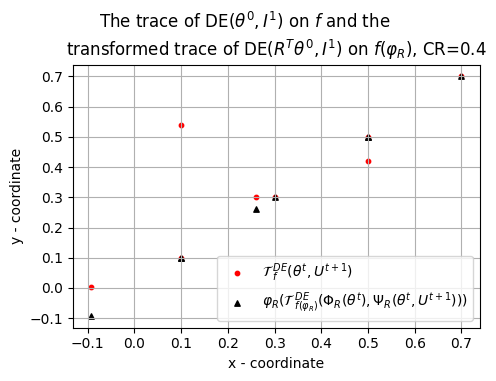

In [275]:
#TODO: make the vectors aligned diagonally
#plt.rcParams['text.usetex'] = True
plt.rcParams["figure.autolayout"] = True

legend_labels = []
for i in range(1):
    vectors = np.array([[0.1,0.1], [0.3, 0.3], [0.5, 0.5], [0.7, 0.7]])
    transformed_vectors = rotate2d_vectors(vectors, -np.pi/4)
    points, t = DE(square_sum, vectors, 0.4, 0.8, 1, seed = 80)
    points_R, T = DE(square_sum_rotated, transformed_vectors, 0.4, 0.8, 1, seed = 80)

    points = np.concatenate([vectors, np.array(t)], axis = 0)
    points_R = np.concatenate([transformed_vectors, np.array(T)], axis = 0)

    plt.rcParams["figure.figsize"] = [5, 4]
    plt.rcParams["figure.autolayout"] = True
    plt.scatter([x[0] for x in points], [x[1] for x in points],s = 10,  c = 'red', label = r'$\mathcal{T}\; ^{{DE}}_f(\theta^t, U^{t+1})$')
    plt.scatter([x[0] for x in rotate2d_vectors(points_R, np.pi/4)], [x[1] for x in rotate2d_vectors(points_R, np.pi/4)], s = 15, marker = '^', c = 'black', label = r'$\varphi_R (\mathcal{T}\; _{f(\varphi_R)}^{{DE}}(\Phi_R(\theta^t), \Psi_R(\theta^t, U^{t+1})))$')
     # Collect legend labels
    if i == 0:
        legend_labels.extend([label for label in plt.gca().get_legend_handles_labels()[1]])
        
    # log scale
    plt.xlabel('x - coordinate')
    plt.ylabel('y - coordinate')
    plt.suptitle(r'The trace of DE$(\theta^0, I^1)$ on $f$ and the', y = 0.94)
    plt.title( r'transformed trace of DE$(R^T\theta^0, I^1)$ on $f(\varphi_R)$, CR=0.4')
plt.legend(legend_labels)
plt.grid()    
plt.show()

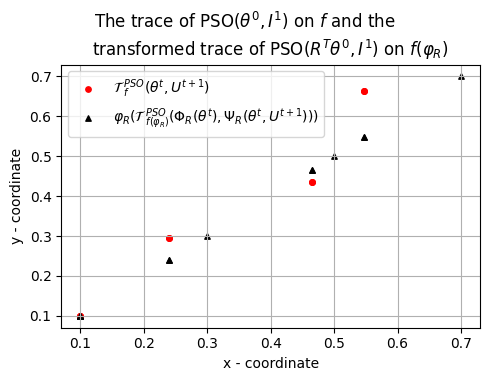

In [272]:
# Code modified from Medium
import numpy as np
import matplotlib.pyplot as plt

# Define the PSO algorithm
def pso(cost_func, dim, num_particles, w, c1, c2, max_iter=100, particles = None, seed = None):
    # Initialize particles and velocities
    if seed is not None:
        np.random.seed(seed)
        random.seed(seed)
    if particles is None:
        particles = np.random.uniform(0, 1, (num_particles, dim))
    velocities = np.zeros((num_particles, dim))

    # Initialize the best positions and fitness values
    best_positions = np.copy(particles)
    best_fitness = np.array([cost_func(p) for p in particles])
    swarm_best_position = best_positions[np.argmin(best_fitness)]
    swarm_best_fitness = np.min(best_fitness)

    # Iterate through the specified number of iterations, updating the velocity and position of each particle at each iteration
    for i in range(max_iter):
        # Update velocities
        r1 = np.random.uniform(0, 1, (num_particles, dim))
        r2 = np.random.uniform(0, 1, (num_particles, dim))
        velocities = w * velocities + c1 * r1 * (best_positions - particles) + c2 * r2 * (swarm_best_position - particles)

        # Update positions
        particles += velocities

        # Evaluate fitness of each particle
        fitness_values = np.array([cost_func(p) for p in particles])

        # Update best positions and fitness values
        improved_indices = np.where(fitness_values < best_fitness)
        best_positions[improved_indices] = particles[improved_indices]
        best_fitness[improved_indices] = fitness_values[improved_indices]
        if np.min(fitness_values) < swarm_best_fitness:
            swarm_best_position = particles[np.argmin(fitness_values)]
            swarm_best_fitness = np.min(fitness_values)

    # Return the updated positions
    return particles, best_positions, swarm_best_position

legend_labels = []
for i in range(1):
    vectors = np.array([[0.1,0.1], [0.3, 0.3], [0.5, 0.5], [0.7, 0.7]])
    transformed_vectors = rotate2d_vectors(vectors, -np.pi/4)
    points, pbest, gbest = pso(square_sum, 2, 4, 0.4, 0.6, 0.3, max_iter=1, particles = vectors, seed = 80)
    points_R, pbest_R, gbest_R = pso(square_sum_rotated, 2, 4, 0.4, 0.6, 0.3, max_iter=1, particles = list(transformed_vectors), seed = 80)


    points = np.concatenate([vectors, np.array(points), np.array(pbest), np.array([gbest])], axis = 0)
    points_R = np.concatenate([transformed_vectors, np.array(points_R), np.array(pbest_R), np.array([gbest_R])], axis = 0)

    plt.rcParams["figure.figsize"] = [5, 4]
    plt.rcParams["figure.autolayout"] = True
    plt.scatter([x[0] for x in points], [x[1] for x in points],s = 15,  c = 'red', label = r'$\mathcal{T}\; ^{{PSO}}_f(\theta^t, U^{t+1})$')
    plt.scatter([x[0] for x in rotate2d_vectors(points_R, np.pi/4)], [x[1] for x in rotate2d_vectors(points_R, np.pi/4)], s = 15, marker = '^', c = 'black', label = r'$\varphi_R (\mathcal{T}\; _{f(\varphi_R)}^{{PSO}}(\Phi_R(\theta^t), \Psi_R(\theta^t, U^{t+1})))$')
     # Collect legend labels
    if i == 0:
        legend_labels.extend([label for label in plt.gca().get_legend_handles_labels()[1]])
        
    # log scale
    plt.xlabel('x - coordinate')
    plt.ylabel('y - coordinate')
    plt.suptitle(r'The trace of PSO$(\theta^0, I^1)$ on $f$ and the', y = 0.94)
    plt.title( r'transformed trace of PSO$(R^T\theta^0, I^1)$ on $f(\varphi_R)$')
plt.legend(legend_labels)
plt.grid()    
plt.show()